# UNSUPERVISED MACHINE LEARNING: CLUSTERING

###### Contents:

- 01. Importing libraries and data

- 02. The Elbow Technique

- 03. K-means clustering

### 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Assign path

path = r'C:\Users\fiyin\OneDrive\Documents\Achievement 6\NYC Motor Vehicle Collisons Analysis'

In [4]:
# Import data

collisions = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared data', 'collisions_explored.pkl'))

In [5]:
collisions.shape

(1001137, 34)

In [6]:
collisions.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG,DUI FLAG,DUI SUM,INJURED BOROUGH TOTAL,KILLED BOROUGH TOTAL
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2,0,...,2021-09,09,September,1.0,0.0,Covid and after,0.0,860.0,NaN,NaN
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1,0,...,2022-03,03,March,1.0,0.0,Covid and after,0.0,137.0,NaN,NaN
2,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0,0,...,2022-06,06,June,0.0,0.0,Covid and after,0.0,398.0,NaN,NaN
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0,0,...,2021-09,09,September,0.0,0.0,Covid and after,0.0,192.0,71157.0,288.0
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0,0,...,2021-12,12,December,0.0,0.0,Covid and after,0.0,222.0,71157.0,288.0


In [7]:
collisions.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'PERSONS INJURED',
       'PERSONS KILLED', 'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED',
       'CYCLISTS INJURED', 'CYCLISTS KILLED', 'MOTORISTS INJURED',
       'MOTORISTS KILLED', 'CAUSE VEHICLE 1', 'CAUSE VEHICLE 2',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'INJURED TOTAL', 'KILLED TOTAL',
       'CRASH HOUR', 'CRASH YEAR', 'CRASH Y-M', 'CRASH MONTH NO',
       'CRASH MONTH', 'INJURY FLAG', 'DEATH FLAG', 'COVID FLAG', 'DUI FLAG',
       'DUI SUM', 'INJURED BOROUGH TOTAL', 'KILLED BOROUGH TOTAL'],
      dtype='object')

In [8]:
collisions.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'PERSONS INJURED',
       'PERSONS KILLED', 'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED',
       'CYCLISTS INJURED', 'CYCLISTS KILLED', 'MOTORISTS INJURED',
       'MOTORISTS KILLED', 'CAUSE VEHICLE 1', 'CAUSE VEHICLE 2',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'INJURED TOTAL', 'KILLED TOTAL',
       'CRASH HOUR', 'CRASH YEAR', 'CRASH Y-M', 'CRASH MONTH NO',
       'CRASH MONTH', 'INJURY FLAG', 'DEATH FLAG', 'COVID FLAG', 'DUI FLAG',
       'DUI SUM', 'INJURED BOROUGH TOTAL', 'KILLED BOROUGH TOTAL'],
      dtype='object')

In [9]:
# Creating subset to be used for clustering analysis

collisions_sub = collisions[['CRASH HOUR', 'PERSONS INJURED', 'PERSONS KILLED',
                             'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED',
                             'CYCLISTS KILLED', 'CYCLISTS INJURED',
                             'MOTORISTS KILLED', 'MOTORISTS INJURED']]

In [10]:
collisions_sub.shape

(1001137, 9)

### 02. Elbow Technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters = i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
# Create a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(collisions_sub).score(collisions_sub) for i in range(len(kmeans))]

score

[-35481693.10397075,
 -11952359.532509739,
 -6549363.988865534,
 -3863493.2374198413,
 -2784696.675585889,
 -2228552.2266473607,
 -1884877.1110875309,
 -1677189.333546307,
 -1484346.6530916102]

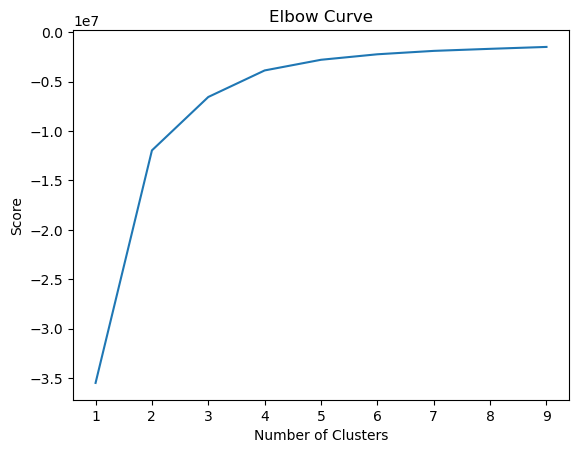

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'elbow_curve.png'))
pl.show()


###### Notes:
Even though there is a slight rise in the curve bewtween four and five, four clusters will be most optimal because that is the point where the curve begins to flatten out.

### 03. K-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(collisions_sub)

KMeans(n_clusters=4)

In [16]:
# Create new column in subset to store the values representing each cluster

collisions_sub['CLUSTERS'] = kmeans.fit_predict(collisions_sub)

C:\Users\fiyin\AppData\Local\Temp\ipykernel_6844\226043476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collisions_sub['CLUSTERS'] = kmeans.fit_predict(collisions_sub)


In [17]:
collisions_sub.head(10)

,CRASH HOUR,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS KILLED,CYCLISTS INJURED,MOTORISTS KILLED,MOTORISTS INJURED,CLUSTERS
0,2,2,0,0,0,0,0,0,2,1
1,11,1,0,0,0,0,0,0,1,3
2,6,0,0,0,0,0,0,0,0,3
3,9,0,0,0,0,0,0,0,0,3
4,8,0,0,0,0,0,0,0,0,3
5,12,0,0,0,0,0,0,0,0,0
6,17,0,0,0,0,0,0,0,0,0
7,8,2,0,0,0,0,0,0,2,3
8,21,0,0,0,0,0,0,0,0,2
9,14,0,0,0,0,0,0,0,0,0


In [18]:
collisions_sub['CLUSTERS'].value_counts(dropna = False)

0    380572
3    260254
2    249375
1    110936
Name: CLUSTERS, dtype: int64

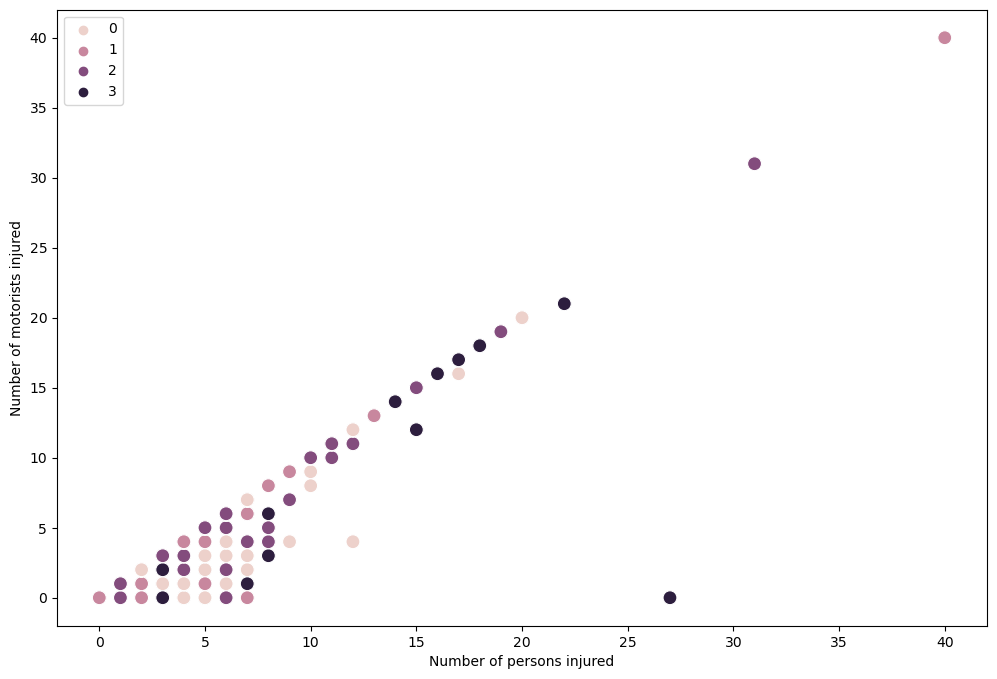

In [19]:
# Plot the clusters for the 'PERSONS INJURED' and 'MOTORISTS INJURED' variables.

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = collisions_sub['PERSONS INJURED'], 
                     y = collisions_sub['MOTORISTS INJURED'], 
                     hue = kmeans.labels_, s = 100) 

ax.grid(False) 

plt.xlabel('Number of persons injured')
plt.ylabel('Number of motorists injured') 
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'motorists_persons_injured_cluster.png'))
plt.show()

###### Notes:

There isn't really any identifiable pattern based on the clusters. The data points in the clusters are scattered all over the plot.

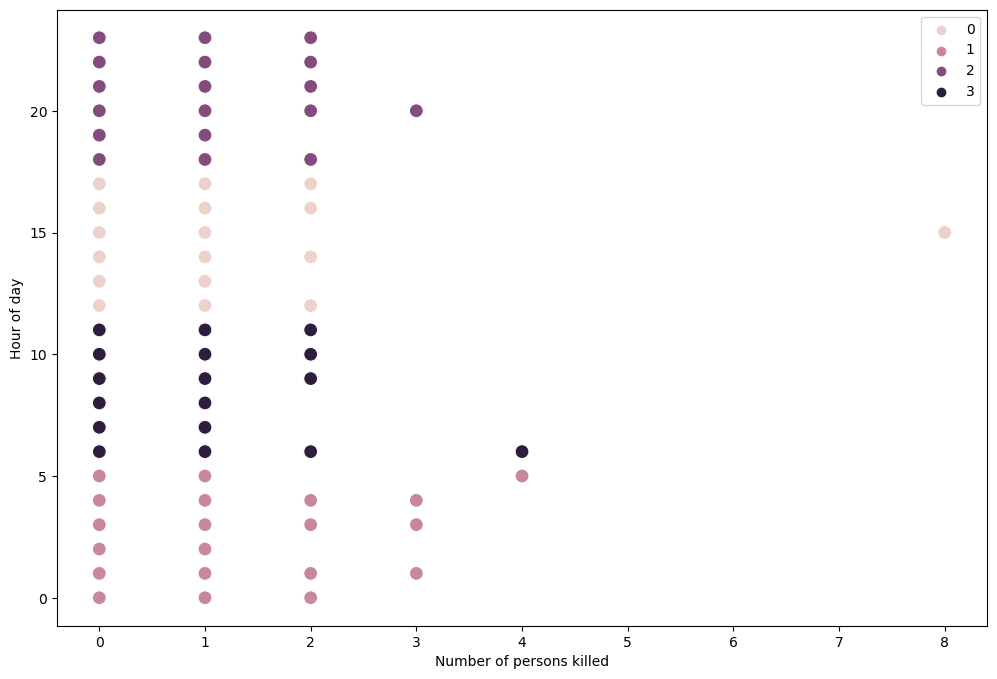

In [20]:
# Plot the clusters for the 'PERSONS KILLED' and 'CRASH HOUR' variables.

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = collisions_sub['PERSONS KILLED'], 
                     y = collisions_sub['CRASH HOUR'], 
                     hue = kmeans.labels_, s = 100) 

ax.grid(False) 

plt.xlabel('Number of persons killed')
plt.ylabel('Hour of day') 
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'persons_killed_hour_cluster.png'))
plt.show()

###### Notes:
- The pattern of the clusters is clearer here; they are grouped by hour of day.
- Most of the data points for the number of persons killed are between 0 and 2.

In [21]:
# Subset where 3 or more persons are killed

persons3 = collisions.loc[collisions['PERSONS KILLED'] >= 3]

In [22]:
persons3.shape

(8, 34)

In [23]:
persons3[['BOROUGH', 'CRASH DATE', 'CRASH TIME',
          'PERSONS KILLED', 'MOTORISTS KILLED',
          'PEDESTRIANS KILLED', 'CYCLISTS KILLED']]

,BOROUGH,CRASH DATE,CRASH TIME,PERSONS KILLED,MOTORISTS KILLED,PEDESTRIANS KILLED,CYCLISTS KILLED
23324,NaN,2021-05-22,04:46:00,3,3,0,0
114129,NaN,2022-02-28,01:44:00,3,3,0,0
118120,STATEN ISLAND,2022-07-10,20:47:00,3,3,0,0
219551,QUEENS,2020-10-06,03:52:00,3,3,0,0
227108,BROOKLYN,2020-07-11,20:18:00,3,3,0,0
270872,NaN,2020-01-25,05:35:00,4,4,0,0
781888,MANHATTAN,2017-10-31,15:08:00,8,0,6,2
818286,QUEENS,2017-09-18,06:17:00,4,2,2,0


###### Notes:
- From this table we see that in 7 out of 8 such incidents, the victims are all motorists. 

- It is also interesting that out of over a million observations in the dataset, there are only 8 cases where there are three or more deaths. 

In [24]:
collisions_sub.loc[collisions_sub['CLUSTERS'] == 3, 'CLUSTER COLOR'] = 'dark purple'
collisions_sub.loc[collisions_sub['CLUSTERS'] == 0, 'CLUSTER COLOR'] = 'pink'
collisions_sub.loc[collisions_sub['CLUSTERS'] == 1, 'CLUSTER COLOR'] = 'light purple'
collisions_sub.loc[collisions_sub['CLUSTERS'] == 2, 'CLUSTER COLOR'] = 'purple'

C:\Users\fiyin\AppData\Local\Temp\ipykernel_6844\3412407639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collisions_sub.loc[collisions_sub['CLUSTERS'] == 3, 'CLUSTER COLOR'] = 'dark purple'


In [25]:
collisions_sub.columns

Index(['CRASH HOUR', 'PERSONS INJURED', 'PERSONS KILLED',
       'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED', 'CYCLISTS KILLED',
       'CYCLISTS INJURED', 'MOTORISTS KILLED', 'MOTORISTS INJURED', 'CLUSTERS',
       'CLUSTER COLOR'],
      dtype='object')

In [26]:
collisions_sub.groupby('CLUSTER COLOR').agg({'CRASH HOUR':['mean', 'median'], 
                                       'PERSONS INJURED':['mean', 'median'], 
                                       'PERSONS KILLED':['mean', 'median'],
                                       'PEDESTRIANS INJURED':['mean', 'median'],
                                       'PEDESTRIANS KILLED':['mean', 'median'],
                                       'CYCLISTS INJURED':['mean', 'median'],
                                       'CYCLISTS KILLED':['mean', 'median'],
                                       'MOTORISTS INJURED':['mean', 'median'],
                                       'MOTORISTS KILLED':['mean', 'median']})

CRASH HOUR        PERSONS INJURED        PERSONS KILLED         \
                    mean median            mean median           mean median   
CLUSTER COLOR                                                                  
dark purple     8.843718    9.0        0.278224    0.0       0.001149    0.0   
light purple    1.912310    1.0        0.382347    0.0       0.003876    0.0   
pink           14.650211   15.0        0.311602    0.0       0.000988    0.0   
purple         20.065780   20.0        0.396812    0.0       0.001909    0.0   

              PEDESTRIANS INJURED        PEDESTRIANS KILLED         \
                             mean median               mean median   
CLUSTER COLOR                                                        
dark purple              0.050455    0.0           0.000596    0.0   
light purple             0.040158    0.0           0.001433    0.0   
pink                     0.054965    0.0           0.000499    0.0   
purple                   0.070095    0.0           0.000954    0.0   

              CYCLISTS INJURED        CYCLISTS KILLED         \
                          mean median            mean median   
CLUSTER COLOR                                                  
dark purple           0.021448    0.0        0.000131    0.0   
light purple          0.020832    0.0        0.000189    0.0   
pink                  0.031311    0.0        0.000108    0.0   
purple                0.041492    0.0        0.000148    0.0   

              MOTORISTS INJURED        MOTORISTS KILLED         
                           mean median             mean median  
CLUSTER COLOR                                                   
dark purple            0.202998    0.0         0.000380    0.0  
light purple           0.317174    0.0         0.002172    0.0  
pink                   0.220768    0.0         0.000360    0.0  
purple                 0.278713    0.0         0.000786    0.0

###### Notes:

- Since the number of casualties in most vehicle collisions is generally very low, these statistics do not give much information. 
- Looking at the median of the 'CRASH HOUR' variable, each cluster represents the period of day when collisions occur:
    - 'dark purple' cluster (median 9am): Morning hours
    - 'light purple' cluster (median 1am): Midnight hours
    - 'pink' cluster (median 3pm):  Afternoon hours
    - 'purple' cluster (median 8pm): Evening hours
- The 'PERSONS INJURED' and 'MOTORISTS INJURED' variables have the better statistics overall (generally due to more non-zero values than other variables).
- Since there isn't a great deal of information from the numerical variables, future analysis could focus on the categorical variables to establish more relationships in the dataset, particularly in determining the causes of accidents.